## Amazon Book Reviews Part V(a): Review Text Length, Helpfulness and Number of Votes

#### This is the 5-core dataset which means that each user and item has at least 5 reviews. The dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/. 

### Introduction

How the length of reviews relates helpfulness ratings and number of votes?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [3]:
query1 = "SELECT totalVote, wordLength, percHelpful FROM amazon_book_small.totalVote \
WHERE unixReviewTime >= '1996-01-01 00:00:00 UTC' AND unixReviewTime < '2013-01-01 00:00:00 UTC'"

In [4]:
project_id = 'dotted-chiller-156222'

In [5]:
da = gbq.read_gbq(query1, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.47 s. Waiting...
Query done.
Processed: 240.0 Mb

Retrieving results...
  Got page: 1; 3.0% done. Elapsed 19.4 s.
  Got page: 2; 5.0% done. Elapsed 25.66 s.
  Got page: 3; 8.0% done. Elapsed 31.04 s.
  Got page: 4; 10.0% done. Elapsed 37.63 s.
  Got page: 5; 13.0% done. Elapsed 42.81 s.
  Got page: 6; 15.0% done. Elapsed 47.61 s.
  Got page: 7; 18.0% done. Elapsed 53.21 s.
  Got page: 8; 20.0% done. Elapsed 58.86 s.
  Got page: 9; 23.0% done. Elapsed 64.16 s.
  Got page: 10; 25.0% done. Elapsed 69.61 s.
  Got page: 11; 28.0% done. Elapsed 101.23 s.
  Got page: 12; 30.0% done. Elapsed 107.54 s.
  Got page: 13; 33.0% done. Elapsed 120.95 s.
  Got page: 14; 36.0% done. Elapsed 126.08 s.
  Got page: 15; 38.0% done. Elapsed 133.0 s.
  Got page: 16; 41.0% done. Elapsed 138.42 s.
  Got page: 17; 43.0% done. Elapsed 143.71 s.
  Got page: 18; 46.0% done. Elapsed 149.99 s.
  Got page: 19; 48.0% done. Elapsed 159.45 s.
  Got page: 20; 51.0% do

In [6]:
da.head(1)

,totalVote,wordLength,percHelpful
0,2,600,0.5


In [7]:
query2 = "SELECT totalVote, wordLength, percHelpful FROM amazon_book_small.totalVote \
WHERE unixReviewTime >= '2013-01-02 00:00:00 UTC' AND unixReviewTime < '2015-01-01 00:00:00 UTC'"

In [8]:
db = gbq.read_gbq(query2, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.46 s. Waiting...
Query done.
Processed: 240.0 Mb

Retrieving results...
  Got page: 1; 2.0% done. Elapsed 20.09 s.
  Got page: 2; 4.0% done. Elapsed 24.75 s.
  Got page: 3; 6.0% done. Elapsed 29.34 s.
  Got page: 4; 8.0% done. Elapsed 34.99 s.
  Got page: 5; 10.0% done. Elapsed 39.12 s.
  Got page: 6; 12.0% done. Elapsed 43.97 s.
  Got page: 7; 14.0% done. Elapsed 49.13 s.
  Got page: 8; 16.0% done. Elapsed 54.1 s.
  Got page: 9; 18.0% done. Elapsed 59.27 s.
  Got page: 10; 20.0% done. Elapsed 64.73 s.
  Got page: 11; 22.0% done. Elapsed 78.23 s.
  Got page: 12; 24.0% done. Elapsed 83.78 s.
  Got page: 13; 26.0% done. Elapsed 88.9 s.
  Got page: 14; 28.0% done. Elapsed 94.75 s.
  Got page: 15; 30.0% done. Elapsed 99.74 s.
  Got page: 16; 32.0% done. Elapsed 104.98 s.
  Got page: 17; 34.0% done. Elapsed 109.99 s.
  Got page: 18; 36.0% done. Elapsed 116.25 s.
  Got page: 19; 38.0% done. Elapsed 121.66 s.
  Got page: 20; 40.0% done. El

In [9]:
db.head(1)

,totalVote,wordLength,percHelpful
0,0,49,NaN


In [10]:
df = pd.concat([da, db])
df = df.fillna(0)
df.head()

,totalVote,wordLength,percHelpful
0,2,600,0.5000
1,16,600,0.9375
2,1,600,1.0000
3,2,600,1.0000
4,5,600,1.0000


In [11]:
df.shape

(8889543, 3)

In [16]:
df.totalVote.max(), df.totalVote.min()

(24212, 0)

In [17]:
df.describe()

,totalVote,wordLength,percHelpful
count,8.895872e+06,8.895872e+06,8.895872e+06
mean,4.050247e+00,1.467505e+02,3.928516e-01
std,2.264039e+01,1.798206e+02,4.439933e-01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,3.600000e+01,0.000000e+00
50%,1.000000e+00,8.000000e+01,0.000000e+00
75%,3.000000e+00,1.890000e+02,1.000000e+00
max,2.421200e+04,6.203000e+03,1.000000e+00


In [18]:
df.corr()

,totalVote,wordLength,percHelpful
totalVote,1.000000,0.151668,0.140932
wordLength,0.151668,1.000000,0.237341
percHelpful,0.140932,0.237341,1.000000


### Histogram of number of votes

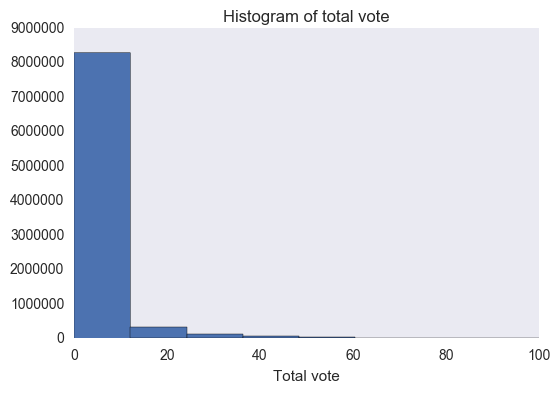

In [159]:
plt.hist(df.totalVote, bins = 2000)
plt.xlabel('Total vote')
plt.title('Histogram of total vote')
plt.xlim([0, 100])
plt.show()

A significant number of votes are in between 0-10. And many reviews did not get a vote.

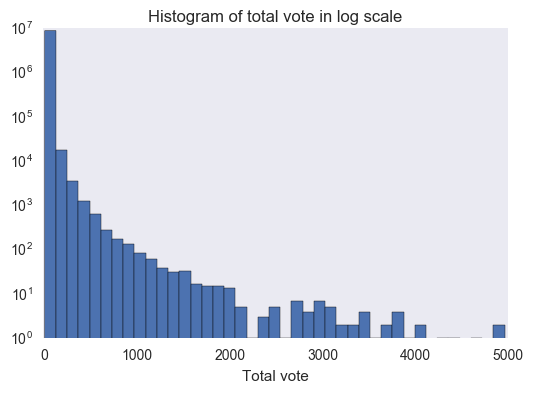

In [140]:
plt.hist(df.totalVote, bins = 200, log=True)
plt.xlim([-20, 5000])
plt.xlabel('Total vote')
plt.title('Histogram of total vote in log scale')
plt.show()

#### We are going to take out the rows for which total vote = 0.

In [14]:
df1 = df[df.totalVote == 0]
len(df1)

4136427

In [92]:
df2 = df[df.totalVote > 0]

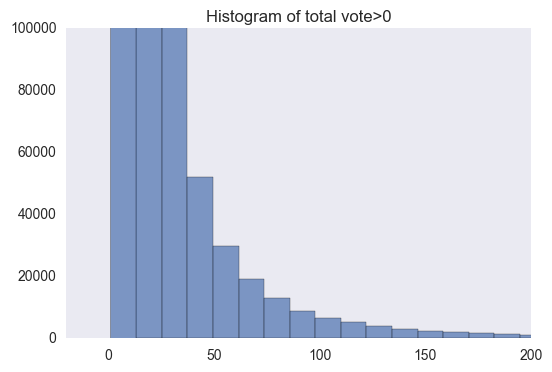

In [142]:
plt.hist(df2.totalVote, bins = 2000, alpha = 0.7)
plt.xlim([-20, 200])
plt.ylim([0, 100000])
plt.title ("Histogram of total vote>0")
plt.show()

In [143]:
df3.head()

,totalVote,wordLength,percHelpful
1,16,600,0.937500
9,12,600,0.666667
12,47,600,0.404255
13,150,600,0.826667
14,17,600,0.705882


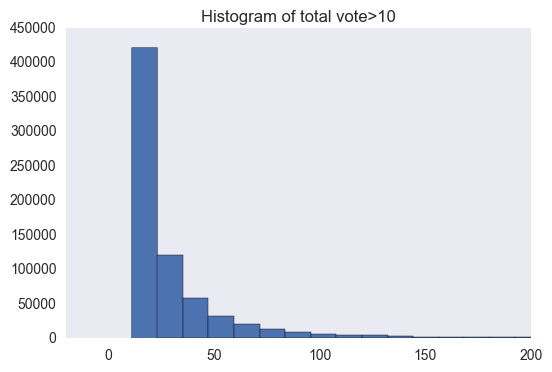

In [144]:
plt.hist(df3.totalVote, bins = 2000)
plt.xlim([-20, 200])
plt.title ("Histogram of total vote>10")
plt.show()

In [27]:
df4 = df[df.totalVote > 20]

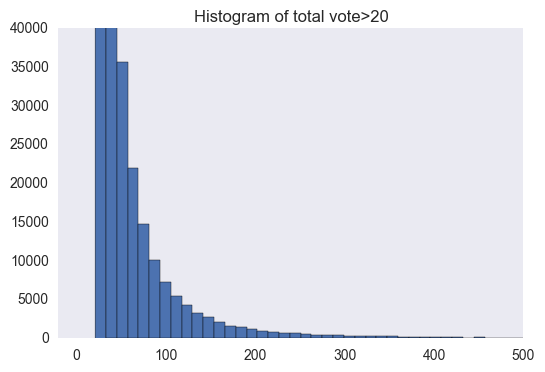

In [146]:
plt.hist(df4.totalVote, bins = 2000)
plt.title ("Histogram of total vote>20")
plt.xlim([-20, 500])
plt.ylim([0, 40000])
plt.show()

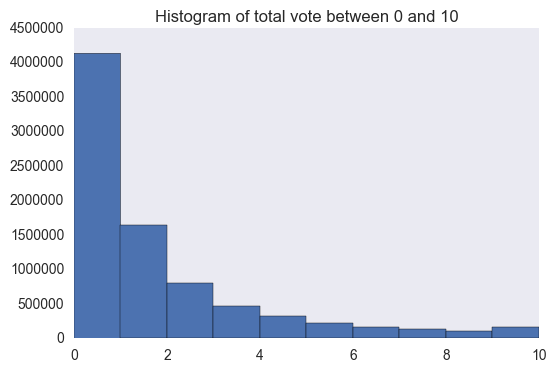

In [147]:
df5 = df[(df.totalVote >= 0) & (df.totalVote <= 10)]
plt.hist(df5.totalVote)
plt.title ("Histogram of total vote between 0 and 10")
plt.show()

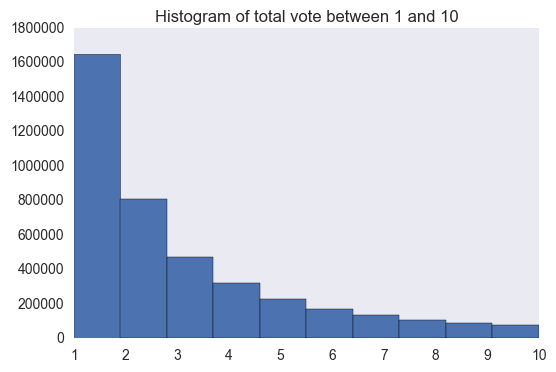

In [149]:
df6 = df[(df.totalVote > 0) & (df.totalVote <= 10)]
plt.hist(df6.totalVote)
plt.title ("Histogram of total vote between 1 and 10")
plt.xlim([1, 10])
plt.show()

In [18]:
df2.totalVote.describe() # Mean of number of votes is 7.5 when we take at least one total vote

count    4.753116e+06
mean     7.579516e+00
std      3.053861e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      2.421200e+04
Name: totalVote, dtype: float64

In [77]:
len(df2[df2.totalVote > 5000]) # Number of votes more than 5000

6

In [19]:
df3 = df[df.totalVote > 10]
len(df3)

713637

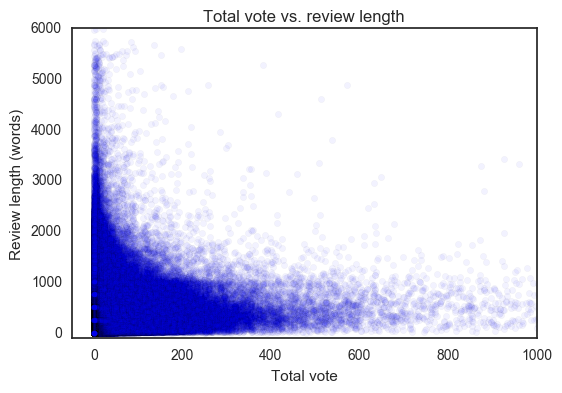

In [150]:
sns.set_style("white")
plt.scatter(df.totalVote, df.wordLength, alpha = 0.05)
plt.xlim([-50, 1000])
plt.ylim(-100, 6000)
plt.xlabel('Total vote')
plt.ylabel('Review length (words)')
plt.title('Total vote vs. review length')
plt.show()

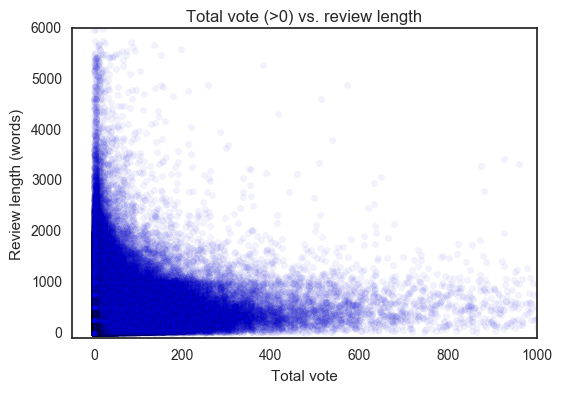

In [152]:
plt.scatter(df2.totalVote, df2.wordLength, alpha = 0.05)
plt.xlim([-50, 1000])
plt.ylim(-100, 6000)
plt.xlabel('Total vote')
plt.ylabel('Review length (words)')
plt.title('Total vote (>0) vs. review length')
plt.show()

In [161]:
df2.corr()

,totalVote,wordLength,percHelpful
totalVote,1.000000,0.140042,0.005569
wordLength,0.140042,1.000000,0.113842
percHelpful,0.005569,0.113842,1.000000


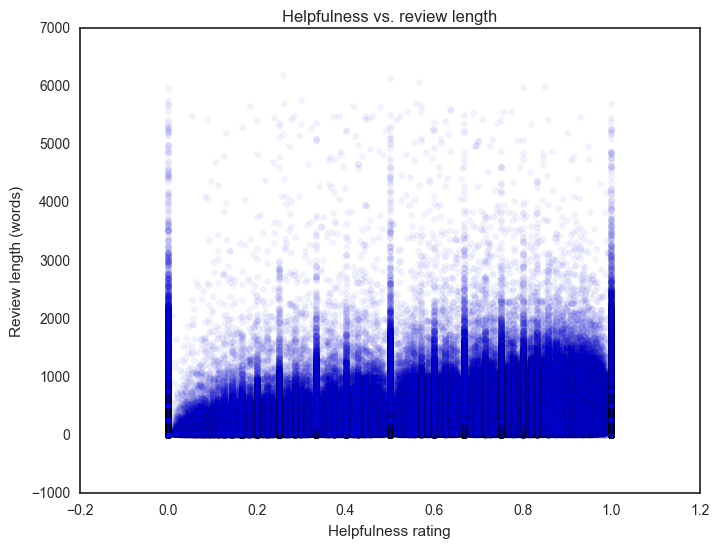

In [153]:
plt.figure(figsize=[8, 6])
plt.scatter(df.percHelpful, df.wordLength, alpha = 0.05)
plt.xlabel('Helpfulness rating')
plt.ylabel('Review length (words)')
plt.title('Helpfulness vs. review length')
plt.show()

Clustering is observed at 0, 0.33, 0.5, 0.66, 1 and some other helpfulness ratings. Why? We will look to find an answer but first look at the distribution when the reviews received at least one vote.

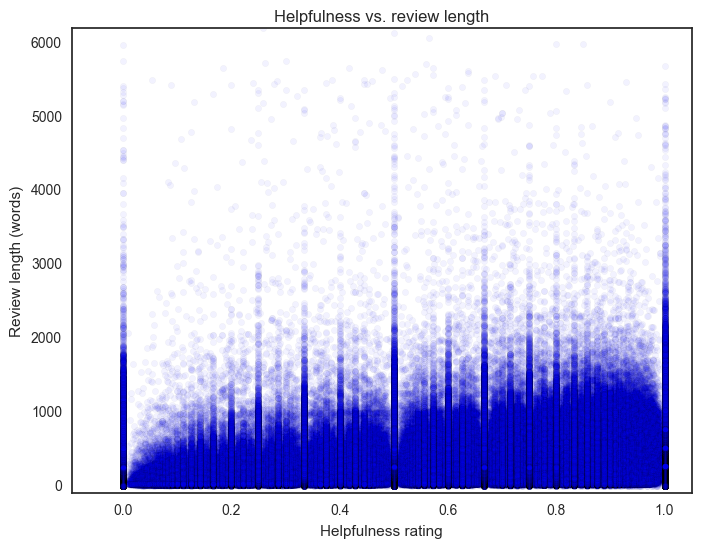

In [162]:
sns.set_style("white")
plt.figure(figsize=[8, 6])
plt.scatter(df2.percHelpful, df2.wordLength, alpha = 0.05)
plt.xlabel('Helpfulness rating')
plt.ylabel('Review length (words)')
plt.title('Helpfulness vs. review length')
plt.xlim([-.095, 1.05])
plt.ylim([-100, 6200])
plt.show()

Clustering is still observed - because there are a lot of votes in between 1-10. We shall look at the relationship between total vote, helpfulness rating and text length.

In [78]:
bins = [-.09, 10, 20, 50, 100, 5000]
bins

[-0.09, 10, 20, 50, 100, 5000]

In [155]:
bins1 = [-.09, 10, 5000]

In [79]:
group_names = ['1-10', '11-20', '21-50', '51-100', '100-5000']

In [156]:
group_names1 = ['<10', '>10'] 

In [93]:
df2['voteCategory'] = pd.cut(df2['totalVote'], bins, labels=group_names)

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
df2.head(1)

,totalVote,wordLength,percHelpful,voteCategory
0,2,600,0.5,1-10


In [157]:
df2['category1'] = pd.cut(df2['totalVote'], bins1, labels=group_names1)

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(-100, 6200)

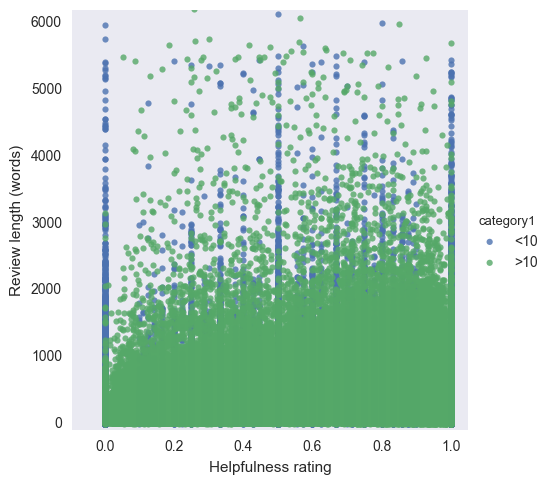

In [158]:
sns.set_style("dark")
sns.lmplot(x = "percHelpful", y = "wordLength", hue = "category1", data=df2, fit_reg= False)
plt.xlabel('Helpfulness rating')
plt.ylabel('Review length (words)')
plt.xlim([-.095, 1.05])
plt.ylim([-100, 6200])

We see that the clustering are observed when the number of votes are in between 1 and 10. I have binned total number of votes into a few more categories (1-10, 10-20 etc.). Let's see how the plot looks:

(-100, 6200)

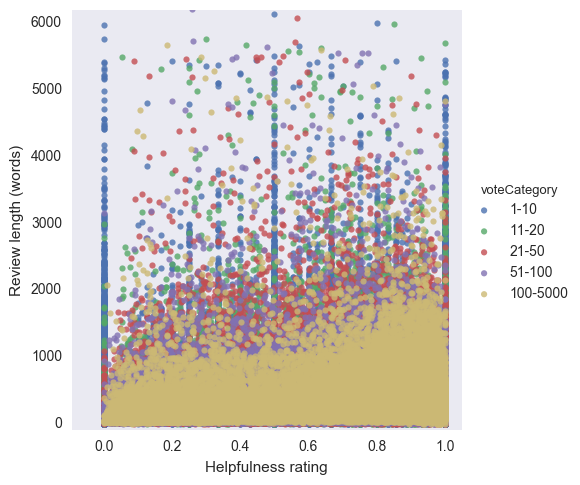

In [134]:
sns.set_style("dark")
sns.lmplot(x = "percHelpful", y = "wordLength", hue = "voteCategory", data=df2, fit_reg= False)
plt.xlabel('Helpfulness rating')
plt.ylabel('Review length (words)')
plt.xlim([-.095, 1.05])
plt.ylim([-100, 6200])

We should also look at how many votes are in each categories

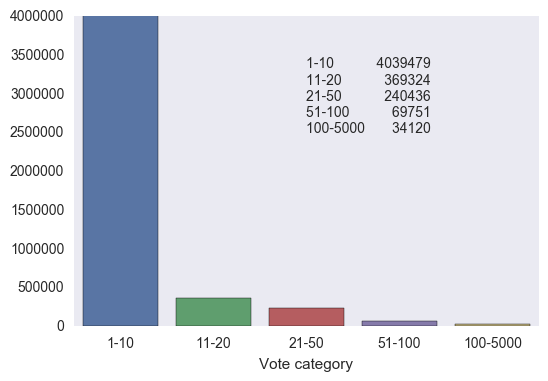

In [164]:
sns.set_style("dark")
a = df2.voteCategory.value_counts()
sns.barplot(a.index, a)
plt.ylim([0, 4000000])
plt.ylabel(" ")
plt.xlabel("Vote category")
plt.text(2, 2500000, "1-10           4039479\n11-20           369324\n21-50           240436\n51-100           69751\n100-5000       34120")